<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/fraud_detection_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **Credit Fraud**

The only 2 things that we know from this data is 1. Transaction 2. Amount.
Because of privacy reson i dont know what the other columns are.

Summary: 
* the transaction amount is small. 
The mean is 88 USD.
* In this database we don't have "NULL" values so we dont have to repalce them.
* Non-Fraud transactions: 99.83%
  Fraud transactions: 0.17%

Something i want to read more about to understand it better!!!!

**PCA Transformation:** The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
**Scaling**: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

In [2]:
#First we import libraries.
import numpy as np #linear algebra
import pandas as pd #pandas to process CSV file. 
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD 
import matplotlib.patches as mpatches 
import time

In [3]:
#import classifier libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import collections

In [4]:
#other libraries 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
#from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy score, classification_report
from collections import Counter 
from sklearn.model_selection import KFold, StratifiedKFold 
import warnings
warnings.filterwarnings("ignore")

In [39]:
#for second explanation
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/data/creditcard 2.csv")

In [7]:
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

The describe() function generates descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution, excluding NaN values.

In [33]:
df.describe()
#where we can see the mean of the amount column: 88.3496$

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [9]:
#we are looking if df has null values that has to be replaced, the result is zero.
df.isnull().sum().max()

0

another way to check null values. 
On using info() function we can check if any of the columns contain null values. Looking at the output it can be seen that all the 31 columns have non-null values.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Since, the dataset contains no null or missing values and all the features seem to be scaled properly, there seems to be no need of any preprocessing. Only the features Time & Amount are required to be scaled.

In [10]:
#The following are the names of the columns of the dataset. In total there are 31 columns.
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Let's analyse the number of Fraud vs Non-Fraud cases. It can be clearly seen from the image below that the number of non-fraudulent transactions clearly outnumber the number of fraudulent transactions.

In [12]:

print("No Frauds", round(df["Class"]. value_counts()[0]/len(df)*100,2), "% of the dataset")
print("Frauds", round(df["Class"]. value_counts()[1]/len(df)*100,2), "% of the dataset")

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

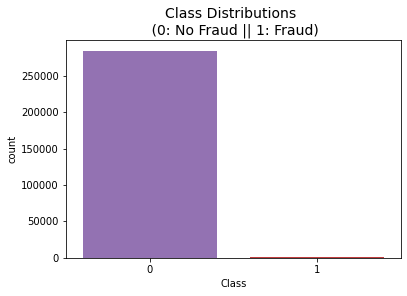

In [37]:
#A single color string referred to by name, RGB or RGBA code and library matplotlib
colors = ['#9467bd', '#d62728']

sns.countplot("Class", data = df, palette = colors)
plt.title("Class Distributions \n (0: No Fraud || 1: Fraud)", fontsize = 14)

In [36]:
group = df.groupby('Class')['Time'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,
                     text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Non-Fraud Cases',
                 width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2),
                 yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

####**Distribution:**
By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. 

**The classes are heavily skewed (shiffted and not distributed equally on left and right)
we need to solve this issue later**

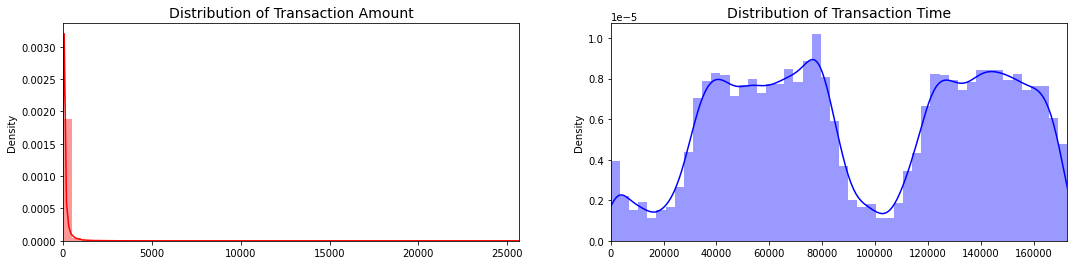

In [31]:
fig, ax = plt.subplots(1,2,figsize = (18,4))
amount_val = df ["Amount"].values
time_val = df['Time'].values

sns.distplot(amount_val, ax = ax[0], color = 'r')
ax[0].set_title("Distribution of Transaction Amount", fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color = 'b')
ax[1].set_title("Distribution of Transaction Time", fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [40]:
#another code to show distribution (learner)
fig = make_subplots(rows=1,cols=2,subplot_titles=['Distribution of Time', 'Distribution of Amount'])
fig.add_trace(go.Histogram(name='Time',histnorm='probability',x=df.Time),1,1)
fig.add_trace(go.Histogram(name='Amount',x=df.Amount),1,2)
fig.update_xaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=1)
fig.update_xaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=2)
fig.update_yaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=1)
fig.update_yaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=2)
fig.update_layout(template='seaborn',width=700,height=300,margin=dict(t=50,b=0,l=0,r=0))
fig.show()

**Feature Scaling**
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Formula: x' = (x-min(x))/(max(x)-min(x))

Cited: https://www.atoti.io/when-to-perform-a-feature-scaling/

## Scaling and Distributing
In this phase of our kernel, we will first scale the columns comprise of **Time** and **Amount** . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
### What is a sub-Sample?
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
### Why do we create a sub-Sample?
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

* **Overfitting:** Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

* **Wrong Correlations:** Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.


### Summary:
**Scaled amount** and **scaled time** are the columns with scaled values.
There are **492 cases** of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, **creating a new sub-sample.**

In [41]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [44]:
scaled_amount = df["scaled_amount"]
scaled_time = df["scaled_time"]

df.drop(["scaled_amount", "scaled_time"], axis =1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, "scaled_time", scaled_time)

#Amount and Time are scaled

df.head()

scaled_amount  scaled_time        V1  ...       V27       V28  Class
0       1.783274    -0.994983 -1.359807  ...  0.133558 -0.021053      0
1      -0.269825    -0.994983  1.191857  ... -0.008983  0.014724      0
2       4.983721    -0.994972 -1.358354  ... -0.055353 -0.059752      0
3       1.418291    -0.994972 -0.966272  ...  0.062723  0.061458      0
4       0.670579    -0.994960 -1.158233  ...  0.219422  0.215153      0

[5 rows x 31 columns]

## RobustScaler 
Scale features using statistics that are robust to outliers.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

## StandardScaler 
Standardize features by removing the mean and scaling to unit variance.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



## Splitting the Data (Original DataFrame)
Before proceeding with the **Random UnderSampling technique** we have to separate the orginal dataframe. **Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.** The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit 

print("No Frauds", round(df["Class"].value_counts()[0]/len(df)*100,2), "% of the dataset" )
print("Frauds", round(df["Class"].value_counts()[1]/len(df)*100,2), "% of the dataset" )

X = df.drop("Class", axis = 1)
y = df["Class"]

learn =StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

for train_index, test_index in learn.split(X,y):
  print("Train", train_index, "Test:", test_index)
  original_Xtrain, original_Xtest, = X.iloc[train_index], X.iloc[test_index]
  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

## We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

#Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)

print("-" * 100)

print("Label Distribution: \n")
print(train_counts_label/len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distribution: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Train_test_split (sklearn.model_selection)
Split arrays or matrices into random train and test subsets

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

###StratifiedShuffleSplit (sklearn.model_selection)
Provides train/test indices to split data in train/test sets.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

##Random Under-Sampling: